In [1]:
import pandas as pd, ipywidgets as widgets, numpy as np, matplotlib.pyplot as plt, io
from adjustText import adjust_text
raw_uploader, eln_uploader = widgets.FileUpload(multiple = False), widgets.FileUpload(multiple = False)
display("Upload ELN w/ Reporter Data and Antibodies Sheet (xlsx)")
display(eln_uploader)

'Upload ELN w/ Reporter Data and Antibodies Sheet (xlsx)'

FileUpload(value={}, description='Upload')

In [2]:
elnname = list(eln_uploader.value.keys())[0]
eln = pd.read_excel(io.BytesIO(eln_uploader.value[elnname]['content']))
reporter_antagonist_data = pd.read_excel(io.BytesIO(eln_uploader.value[elnname]['content']), sheet_name = "Reporter Antagonist")
ab_sheet = pd.read_excel(io.BytesIO(eln_uploader.value[elnname]['content']), sheet_name = "Antibody Plate Map")
reporter_agonist_data

,4,5,6,7,8,9,10,11,12,13,...,15,16,17,18,19,20,21,22,23,24
0,0.969843,0.721153,0.390442,0.575159,0.529244,0.696050,0.619938,0.332241,0.512469,0.530015,...,0.417955,0.453654,0.621416,0.506512,0.517839,0.512453,0.380102,0.506417,0.760363,0.778887
1,0.585494,0.455703,0.361180,0.623749,0.507470,0.731886,0.416216,0.278296,0.583017,0.588745,...,0.377372,0.319311,0.629166,0.630427,0.352494,0.429464,0.378643,0.516151,0.604934,0.577633
2,0.808891,0.487259,0.399783,0.915310,0.961854,0.692753,0.569891,0.313854,0.521521,0.621039,...,0.367270,0.366250,0.530228,0.417263,0.499034,0.475569,0.303949,0.627566,0.672297,0.764056
3,0.548323,0.521222,0.451571,0.668966,0.563796,0.644345,0.517239,0.270686,0.492690,0.491279,...,0.428339,0.360787,0.604863,0.382740,0.464264,0.496194,0.460915,0.594147,0.538169,0.489847
4,0.701051,0.475535,1.284458,0.705499,0.488943,0.857411,0.600514,0.309749,0.560593,0.530263,...,0.275547,0.444050,0.416688,0.791936,0.555081,0.538271,0.285559,0.537702,0.749167,0.785052
5,0.970390,0.416593,0.741606,0.762899,0.779274,0.768178,0.463325,0.362393,0.591882,0.489558,...,0.263336,0.365516,0.493217,0.510900,0.677681,0.571118,0.595053,0.643845,0.781863,0.706876
6,0.580092,0.337583,0.528307,0.673049,0.502832,0.599926,0.597253,0.356113,0.509113,0.423877,...,0.284448,0.533131,0.654069,0.938301,0.540247,0.496018,0.359209,0.825006,0.640678,0.706847
7,0.582037,0.454299,0.634949,0.488732,0.643203,0.451061,0.439350,0.350527,0.364161,0.414170,...,0.676374,0.459826,0.461559,0.521236,0.433278,0.509392,0.357621,0.791355,0.439308,0.495698
8,0.464409,0.304585,0.490670,0.837885,0.717649,0.612420,0.428841,0.296359,0.441815,0.405577,...,0.356441,0.386181,0.682695,0.488073,0.534376,0.634662,0.449353,0.651820,0.605496,0.566359
9,0.630381,0.334645,0.339126,0.468000,0.627864,0.665369,0.502215,0.451678,0.539685,0.539979,...,0.346316,0.302755,0.563988,0.602802,0.623639,0.458825,0.451479,0.393335,0.644665,0.448499


In [6]:
#Concatenate all antagonist columns into a their respective single Series
reporter_antagonist_column = pd.Series()
for column in reporter_agonist_data.columns:
    colToAdd = reporter_antagonist_data[column]
    reporter_antagonist_column = pd.concat([reporter_antagonist_column, colToAdd], axis = 0, ignore_index = True)

/var/folders/hb/zkjzwn3n2dqc5b49y7f8tbpc0000gq/T/ipykernel_13531/2559269810.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  reporter_agonist_column = pd.Series()
/var/folders/hb/zkjzwn3n2dqc5b49y7f8tbpc0000gq/T/ipykernel_13531/2559269810.py:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  reporter_antagonist_column = pd.Series()


In [8]:
#Separate n=1 and n=2 duplicates, average them and reset the indeces: for Antagonist conditions
firsts = reporter_antagonist_column.iloc[::2]
seconds = reporter_antagonist_column.iloc[1::2]
first_reset = firsts.reset_index(drop = True)
second_reset = seconds.reset_index(drop = True)
averageAntagonists = first_reset + second_reset
averageAntagonists = averageAntagonists / 2

In [9]:
#Create new DF for concatenating the Agonist, Antagonist signals, and the Antibody Plate Map
OutputSheet = pd.concat([averageAgonists, averageAntagonists, ab_sheet], axis = 1)
OutputSheet.index += 1
OutputSheet.rename(inplace = True, columns = {0: "Antagonist Mode"})
OutputSheetCleaned = OutputSheet[["Antagonist Mode", "DNA", "Protein Concentration (ug/uL)"]]
OutputSheetCleaned.to_excel("Reporter_Output.xlsx")
AntagonistSort = OutputSheetCleaned.sort_values(by="Antagonist Mode", ascending = False)

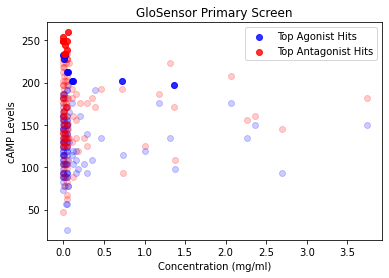

In [40]:
Top10Antagonists = OutputSheetCleaned.nsmallest(10, "Antagonist Mode")
fig, ax = plt.subplots()
ax.scatter(x = OutputSheetCleaned["Protein Concentration (ug/uL)"], y=OutputSheetCleaned["Antagonist Mode"], alpha = .2, color = "red")
ax.scatter(x = Top10Antagonists["Protein Concentration (ug/uL)"], y = Top10Antagonists["Antagonist Mode"], alpha = .8, color = "red", label = "Top Antagonist Hits")
ax.set_title("BRET Primary Screen")
ax.set_xlabel("Concentration (mg/ml)")
ax.set_ylabel("cAMP Levels")
ax.legend()
